In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings(action="ignore")

## 1. Load the dataset into python environment

In [3]:
dt=pd.read_excel("iris (1).xls")

In [4]:
dt.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 2. Check the basic details of the dataset

In [5]:
dt.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
dt.info

<bound method DataFrame.info of       SL   SW   PL   PW  Classification
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    NaN  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  NaN  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]>

In [7]:
dt.shape

(150, 5)

In [8]:
dt.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
dt.Classification.nunique()

3

In [10]:
dt.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [11]:
dt.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

## 3. Preprocessing steps

### Finding null values and filling them

<AxesSubplot:xlabel='SL', ylabel='Density'>

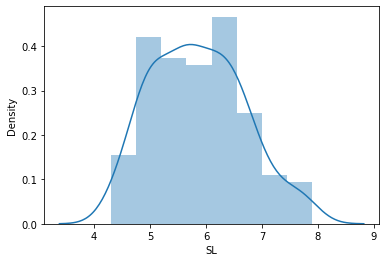

In [12]:
# plotting "SL" distplot 
x = dt["SL"]
sns.distplot(x)

<AxesSubplot:xlabel='SW', ylabel='Density'>

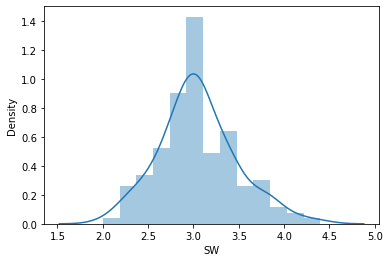

In [13]:
# plotting "SW" distplot
x = dt["SW"]
sns.distplot(x)

<AxesSubplot:xlabel='PL', ylabel='Density'>

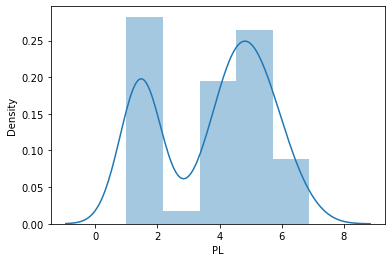

In [14]:
# plotting "PL" distplot
x = dt["PL"]
sns.distplot(x)

In [15]:
dt.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [16]:
# It is found that null values are found in three of the columns of the given dataset.So we have to fill the nullvalues present

In [17]:
# So the null values are filled with median for "SL","SW","PL".

In [18]:
dt["SL"] = dt["SL"].fillna(dt["SL"].median())
dt["SW"] = dt["SW"].fillna(dt["SW"].median())
dt["PL"] = dt["PL"].fillna(dt["PL"].median())

In [19]:
# Checking the null values after the correction
dt.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [20]:
# It is found that there is no more null values present.

In [21]:
dt.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Checking,Finding and removal of outliers

Text(0.5, 1.0, 'Boxplot of SW')

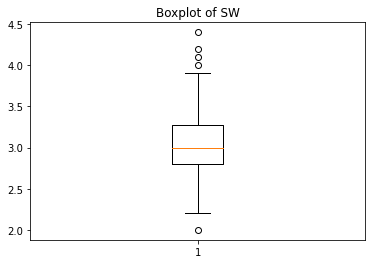

In [22]:
# plotting boxplot of "SW" 
plt.boxplot(dt["SW"])
plt.title("Boxplot of SW")

In [23]:
# characteristcs of "SW" in the dataset
dt.SW.describe()

count    150.000000
mean       3.047333
std        0.421995
min        2.000000
25%        2.800000
50%        3.000000
75%        3.275000
max        4.400000
Name: SW, dtype: float64

In [24]:
# Finding Q1 and Q3 quantile for "SW"
Q1 = dt.SW.quantile(0.25)
Q3 = dt.SW.quantile(0.75)
Q1,Q3

(2.8, 3.275)

In [25]:
IQR=Q3-Q1
IQR

0.4750000000000001

In [26]:
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
low_lim,up_lim

(2.0874999999999995, 3.9875)

In [27]:
# checking the outliers list
dt[(dt.SW < low_lim)|(dt.SW > up_lim)]

,SL,SW,PL,PW,Classification
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [28]:
# data after the removal of the outliers
dt = dt[(dt.SW > low_lim)&(dt.SW < up_lim)]


In [29]:
dt.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
# label encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dt["Classification"] = label_encoder.fit_transform(dt["Classification"])
dt.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 4. Find out which classification model gives the best result to predict iris species.

In [32]:
X= dt.drop(["Classification"],axis=1)
y= dt["Classification"]

In [33]:
X.shape

(145, 4)

In [34]:
y.shape

(145,)

### Split the dataset

In [35]:
# split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

## Logistic Regression 

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()  #Build
lr.fit(X_train,  y_train) #Train
y_predict = lr.predict(X_test) #Make Prediction

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score

In [38]:
print("Accuracy is:",accuracy_score(y_test,y_predict))
print("Precision is:",precision_score(y_test,y_predict,average="macro"))
print("Recall is:",recall_score(y_test,y_predict,average="macro"))
print("f1 score is:",f1_score(y_test,y_predict,average="macro"))

Accuracy is: 0.8918918918918919
Precision is: 0.8834498834498835
Recall is: 0.8915343915343915
f1 score is: 0.8839506172839506


In [39]:
confusion_matrix(y_test,y_predict)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  2, 12]], dtype=int64)

## KNN 

In [40]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric="minkowski")
    classifier.fit(X_train,  y_train) #Train
    y_predict = classifier.predict(X_test)  #Make Prediction
    acc = accuracy_score(y_test, y_predict)
    acc_values.append(acc)

In [41]:
acc_values

[0.918918918918919,
 0.8918918918918919,
 0.918918918918919,
 0.8648648648648649,
 0.8918918918918919,
 0.8378378378378378,
 0.918918918918919,
 0.8918918918918919,
 0.918918918918919,
 0.8648648648648649,
 0.8648648648648649,
 0.8648648648648649]

Text(0, 0.5, 'accuracy')

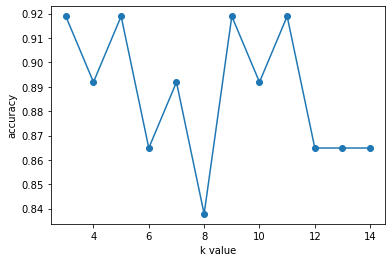

In [42]:
plt.plot(neighbors, acc_values, "o-")
plt.xlabel("k value")
plt.ylabel("accuracy")

In [43]:
classifier = KNeighborsClassifier(n_neighbors=k, metric="minkowski")
classifier.fit(X_train,  y_train) #Train
y_predict = classifier.predict(X_test)  #Make Prediction

In [44]:
confusion_matrix(y_test,y_predict)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  3, 11]], dtype=int64)

In [45]:
print("Accuracy is:",accuracy_score(y_test,y_predict))
print("Precision is:",precision_score(y_test,y_predict,average="macro"))
print("Recall is:",recall_score(y_test,y_predict,average="macro"))
print("f1 score is:",f1_score(y_test,y_predict,average="macro"))

Accuracy is: 0.8648648648648649
Precision is: 0.861111111111111
Recall is: 0.8677248677248678
f1 score is: 0.8570071903405238


## Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
df = DecisionTreeClassifier() #Build
df.fit(X_train,  y_train) #Train
y_predict = df.predict(X_test)

In [47]:
confusion_matrix(y_test,y_predict)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  2, 12]], dtype=int64)

In [48]:
print("Accuracy is:",accuracy_score(y_test,y_predict))
print("Precision is:",precision_score(y_test,y_predict,average="macro"))
print("Recall is:",recall_score(y_test,y_predict,average="macro"))
print("f1 score is:",f1_score(y_test,y_predict,average="macro"))

Accuracy is: 0.918918918918919
Precision is: 0.9076923076923077
Recall is: 0.9153439153439153
f1 score is: 0.9103313840155945


## Random Forest 

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier() #Build
rf.fit(X_train,  y_train) #Train
y_predict = rf.predict(X_test)  #Make Prediction

In [50]:
confusion_matrix(y_test,y_predict)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 13]], dtype=int64)

In [51]:
print("Accuracy is:",accuracy_score(y_test,y_predict))
print("Precision is:",precision_score(y_test,y_predict,average="macro"))
print("Recall is:",recall_score(y_test,y_predict,average="macro"))
print("f1 score is:",f1_score(y_test,y_predict,average="macro"))

Accuracy is: 0.9459459459459459
Precision is: 0.9391534391534391
Recall is: 0.9391534391534391
f1 score is: 0.9391534391534391


## SVM linear

In [52]:
from sklearn.svm import SVC
svm = SVC(probability=True, kernel="linear")  #Build
svm.fit(X_train,  y_train) #Train
y_predict = svm.predict(X_test)  #Make Prediction

In [53]:
confusion_matrix(y_test,y_predict)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  2, 12]], dtype=int64)

In [54]:
print("Accuracy is:",accuracy_score(y_test,y_predict))
print("Precision is:",precision_score(y_test,y_predict,average="macro"))
print("Recall is:",recall_score(y_test,y_predict,average="macro"))
print("f1 score is:",f1_score(y_test,y_predict,average="macro"))

Accuracy is: 0.918918918918919
Precision is: 0.9076923076923077
Recall is: 0.9153439153439153
f1 score is: 0.9103313840155945


## SVM polynomial

In [55]:
from sklearn.svm import SVC
svm = SVC(probability=True, kernel="poly", degree=3)  #Build
svm.fit(X_train,  y_train) #Train
y_predict = svm.predict(X_test)  #Make Prediction

In [56]:
confusion_matrix(y_test,y_predict)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  0, 14]], dtype=int64)

In [57]:
print("Accuracy is:",accuracy_score(y_test,y_predict))
print("Precision is:",precision_score(y_test,y_predict,average="macro"))
print("Recall is:",recall_score(y_test,y_predict,average="macro"))
print("f1 score is:",f1_score(y_test,y_predict,average="macro"))

Accuracy is: 0.9459459459459459
Precision is: 0.9407407407407407
Recall is: 0.9391534391534391
f1 score is: 0.9391230310770541


## SVM Radial

In [58]:
from sklearn.svm import SVC
svm = SVC(probability=True, kernel="poly", degree=3)  #Build
svm.fit(X_train,  y_train) #Train
y_predict = svm.predict(X_test)  #Make Prediction

In [59]:
confusion_matrix(y_test,y_predict)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  0, 14]], dtype=int64)

In [60]:
print("Accuracy is:",accuracy_score(y_test,y_predict))
print("Precision is:",precision_score(y_test,y_predict,average="macro"))
print("Recall is:",recall_score(y_test,y_predict,average="macro"))
print("f1 score is:",f1_score(y_test,y_predict,average="macro"))

Accuracy is: 0.9459459459459459
Precision is: 0.9407407407407407
Recall is: 0.9391534391534391
f1 score is: 0.9391230310770541


## Gradient Booster

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gm = GradientBoostingClassifier()  #Build
gm.fit(X_train,  y_train) #Train
y_predict = gm.predict(X_test)  #Make Prediction

In [62]:
confusion_matrix(y_test,y_predict)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 13]], dtype=int64)

In [63]:
print("Accuracy is:",accuracy_score(y_test,y_predict))
print("Precision is:",precision_score(y_test,y_predict,average="macro"))
print("Recall is:",recall_score(y_test,y_predict,average="macro"))
print("f1 score is:",f1_score(y_test,y_predict,average="macro"))

Accuracy is: 0.9459459459459459
Precision is: 0.9391534391534391
Recall is: 0.9391534391534391
f1 score is: 0.9391534391534391


 Conclusion
   * From the various algorithms executed here,we get, the values of f1 score for them are different.
   * Among them Gradient Booster and Random Forest show f1 score of 0.93915.
   * Where as SVM radial and polynomial shows 0.93912 f1 score.
   * Decision Tree shows 0.9103 as f1 score,KNN shows 0.857 and logistic shows 0.883 as its f1 score
   
    
    
    
 

From the above data in reference with the f1 score we can interpret that 
* Gradient Booster,RandomForest,SVM radial and SVM polynomial have highest f1 score with negligible difference in values among   them.So, They represent to be a better fit than others.
* Whereas KNN have a low f1 score in this case in comparison to others.

From the above data in reference with the accurcy we can interpret that
* Gradient Booster,RandomForest,SVM radial and SVM polynomial have the highest accuracy of 0.9459 in comparison with others.

 Therefore,
 Gradient Booster,RandomForest,SVM radial and SVM polynomial shows a better fit to represent the classification of iris species.  